<a href="https://colab.research.google.com/github/BI-DS/EBA-3530/blob/main/Lecture_8/decision_hyperplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# $\color{blue}{\text{Decision Hyperplanes}}$

As discussed in class, any linear function, e.g.
$$
y(\mathbf{x})=\mathbf{w^Tx}+w_0
$$
satisfying the condition
$$
\mathbf{w^T}(\mathbf{x}_1-\mathbf{x}_2)=0,
$$
where $\mathbf{x}_i$ $i=1,2$ are vectors on the decision hyperplane, is a linear discriminant function.


Let us see how decision hyperplanes work!

### $\color{green}{\text{First create some random data that we can classify}}$

In [2]:
def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0, diff=0):
     rng = np.random.RandomState(seed)
     X = np.concatenate(
         [
        np.matmul(rng.randn(n_samples-diff, n_features),cov_class_1),
        np.matmul(rng.randn(n_samples, n_features),cov_class_2)+np.array([1, 1])
         ]
     )
     y = np.concatenate([np.zeros(n_samples-diff), np.ones(n_samples)])
     return X, y

In [3]:
covariance = np.array([[0.0, -0.23], [0.83, 0.23]])
X, y = make_data(
     n_samples=300,
     n_features=2,
     cov_class_1=covariance,
     cov_class_2=covariance,
     seed=0,
)

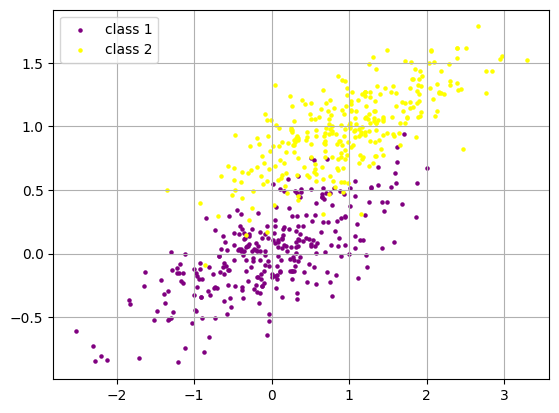

In [25]:
plt.scatter(X[y==0,0], X[y==0,1], c='purple', s=5, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], c='yellow', s=5, label='class 2')
plt.legend()
plt.grid()
plt.show()

### $\color{green}{\text{Add a vector of 1s to fit an intercept}}$

In [19]:
X_a = np.concatenate([np.ones((X.shape[0],1)),X], axis=1)

### $\color{green}{\text{Fit a logistic regression}}$

In [20]:
log_reg = sm.Logit(y, X_a).fit()
beta = log_reg.params

Optimization terminated successfully.
         Current function value: 0.138120
         Iterations 9


Note that the linear discriminat function can be expressed as
\begin{align}
\mathbf{w^Tx}+w_0 =& 0 \\
x_2 =& -\frac{w_0}{w_2} - \frac{w_1}{w_2}x_1 \tag{2}
\end{align}
Equation 2 is the equation of a line!

### $\color{green}{\text{Define decision hyperplane as a lambda function}}$

In [21]:
decision_hyperplane = lambda x1: -beta[0]/beta[2] - beta[1]/beta[2]*x1

The linear discrimiant function is a **signed measure**, i.e. $\mathbf{x}$ is assigned to class 1 if $y(\mathbf{x}) \geq 0$ and to class 2 otherwise!

### $\color{green}{\text{Define linear discriminant function as lambda function}}$

In [22]:
g = lambda x: np.dot(beta[1:].T,x) + beta[0]

In [23]:
if g(X[341,:]) >= 0:
  print('vector 341 belong to class 1')
else:
  print('vector 341 belong to class 2')
if g(X[0,:]) >= 0:
  print('vector 0 belong to class 1')
else:
  print('vector 0 belong to class 2')

vector 341 belong to class 1
vector 0 belong to class 2


### $\color{green}{\text{Plot decision hyperplane}}$

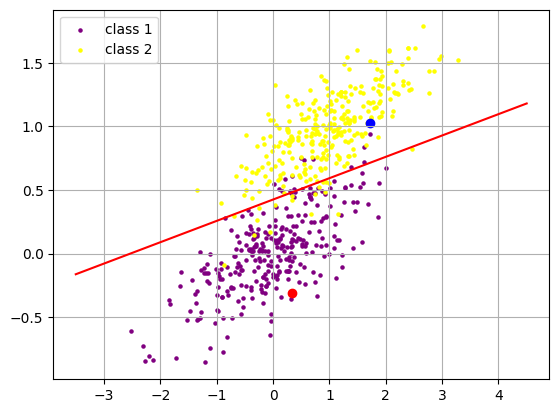

In [35]:
xval = np.linspace(-3.5,4.5,100)
plt.scatter(X[y==0,0], X[y==0,1], c='purple', s=5, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], c='yellow', s=5, label='class 2')
plt.scatter(X[0,0], X[0,1], color='red')
plt.scatter(X[341,0], X[341,1], color='blue')
plt.plot(xval,decision_hyperplane(xval),color='red')
plt.legend()
plt.grid()
plt.show()

We can also plot the decision hyperplane using contour plots. To that end, we need to define a grid of values in the 2D space and then we can use `plt.contour` or `plt.contourf` to filled the contours.

In [31]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = log_reg.predict(np.c_[np.ones((xx.size,1)), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

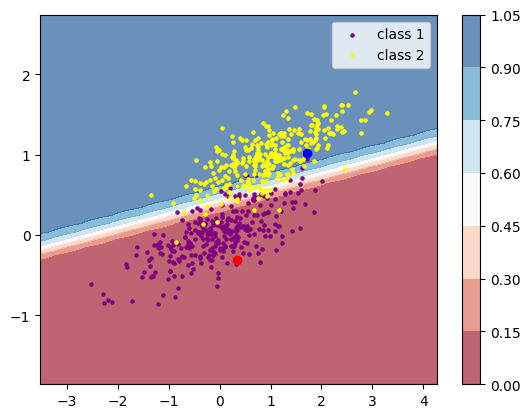

In [36]:
C = plt.contourf(xx,yy,Z,cmap='RdBu',alpha=0.65)
plt.colorbar(C)
plt.scatter(X[y==0,0], X[y==0,1], c='purple', s=5, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], c='yellow', s=5, label='class 2')
plt.scatter(X[0,0], X[0,1], color='red')
plt.scatter(X[341,0], X[341,1], color='blue')
plt.legend()
#CS=plt.contour(xx,yy,Z,(0.5,), colors='k', linewidths=2)
#plt.clabel(CS,inline=1,fontsize=14)
plt.show()